In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import pickle

In [2]:
# Get the power and modulation from CSV files
ao_modulation = np.genfromtxt('AO_modulation.csv', delimiter=',')
optical_power = np.genfromtxt('Optical_Power.csv', delimiter=',')

In [3]:
# Rescale the optical power
rescaled_optical = optical_power[:,1]-min(optical_power[:,1])
rescaled_optical = rescaled_optical/max(rescaled_optical)

# Pull out AO modulation
ao_mod = ao_modulation[:,1]

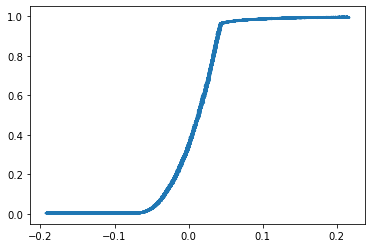

In [4]:
# Plot things up
plt.plot(ao_mod,rescaled_optical)
plt.show()

In [5]:
# Get rid of non-unique indices so we can interpolate
_, indices = np.unique(rescaled_optical,return_index=True)

rescaled_optical_unique = rescaled_optical[indices]
ao_mod_unique = ao_mod[indices]

In [6]:
# Do the interpolation
op_to_ao = interp1d(rescaled_optical_unique,ao_mod_unique,kind='cubic')

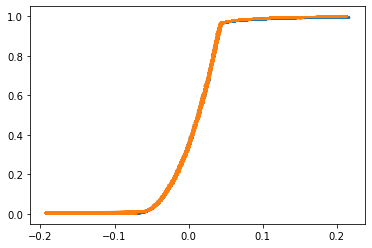

In [7]:
# Check the interpolation works
plt.plot(ao_mod,rescaled_optical)
plt.plot(op_to_ao(rescaled_optical),rescaled_optical)
plt.show()

In [11]:
# Dump to pickle file
pickle.dump(op_to_ao,open('ao_interpolation.pck','wb'))